# Example usage for "movekit"

In [1]:
import movekit as mkit
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean


In [2]:
os.chdir('..')
import src.movekit.io as imp
import src.movekit.feature_extraction as fe

### Read in CSV file

In [3]:
# Enter path to CSV file
path = "./examples/datasets/fish-5.csv"

In [4]:
# Read in CSV file using appropriate method-
data = imp.read_data(path)
data.head(11)

,time,animal_id,x,y
0,1,312,405.29,417.76
1,1,511,369.99,428.78
2,1,607,390.33,405.89
3,1,811,445.15,411.94
4,1,905,366.06,451.76
5,2,312,405.31,417.37
6,2,511,370.01,428.82
7,2,607,390.25,405.89
8,2,811,445.48,412.26
9,2,905,365.86,451.76


#### Preprocess the data

In [5]:
preprocessed_data = mkit.preprocess(data)


 Number of missing values = y            0
x            0
animal_id    0
time         0
dtype: int64



In [130]:
data_groups = fe.grouping_data(preprocessed_data)

In [6]:
feats = fe.extract_features(preprocessed_data)

In [7]:
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans
X = random_walks(n_ts=50, sz=32, d=2)

In [8]:
varlst = ["x", "y"]
data_groups = fe.grouping_data(preprocessed_data)

extract = ["time", "animal_id"]
for i in varlst:
    extract.append(i)

In [13]:
varlst = ["x", "y", "average_speed"]

In [14]:
traj = fe.grouping_data(feats, pick_vars = varlst)

In [38]:
tracks = []

for i in [*traj.keys()]:
    tracks.append(traj[i].values.tolist())
    

In [40]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=0)
km = km.fit(tracks)

In [49]:
km.cluster_centers_.tolist()

[[[405.605, 431.85, 0.0],
  [405.67, 432.01, 0.0],
  [405.735, 432.185, 0.0],
  [405.79999999999995, 432.38, 0.0],
  [405.855, 432.59000000000003, 0.0],
  [405.905, 432.81, 0.0],
  [405.94500000000005, 433.04999999999995, 0.0],
  [405.975, 433.305, 0.0],
  [405.985, 433.59000000000003, 0.0],
  [405.95500000000004, 433.865, 0.26046025051150246],
  [405.935, 434.155, 0.2917348128481087],
  [405.9, 434.44, 0.2921210155731396],
  [405.855, 434.76, 0.29880432500231535],
  [405.765, 435.025, 0.30271058273838447],
  [405.69, 435.285, 0.30906884145028535],
  [405.66999999999996, 435.58, 0.31893714047762906],
  [405.655, 435.87, 0.3304419232141785],
  [405.59000000000003, 436.05999999999995, 0.3335790180767148],
  [405.53999999999996, 436.29999999999995, 0.33764597014447306],
  [405.53, 436.52, 0.33826095322041705],
  [405.56, 436.7, 0.33268901074539914],
  [405.57, 436.90999999999997, 0.32564582708803624],
  [405.52, 437.1, 0.31116257951994786],
  [405.44, 437.25, 0.2978761891366653],
  [405.3

In [53]:
def ts_cluster(feats, n_clust, varlst = ["x", "y"], metric="euclidean", max_iter=5, random_state=0, inertia=False):
    data_groups = fe.grouping_data(feats)

    traj = fe.grouping_data(feats, pick_vars = varlst)
    
    tracks = []

    for i in [*traj.keys()]:
        tracks.append(traj[i].values.tolist())
    
    km = TimeSeriesKMeans(n_clusters=3, metric=metric, max_iter=max_iter, random_state=random_state)
    km = km.fit(tracks)

    clustcens = km.cluster_centers_.tolist()
    for aid in range(len(traj)):
        clust = [*km.labels_][aid]
        data_groups[[*data_groups.keys()][aid]] = data_groups[[*data_groups.keys()][aid]].assign(cluster=clust)
        data_groups[[*data_groups.keys()][aid]] = data_groups[[*data_groups.keys()][aid]].assign(
            ClustCenter=clustcens[clust])
        #data_groups[[*data_groups.keys()][aid]][['Center_x', 'Center_y']] = pd.DataFrame(
        #    data_groups[[*data_groups.keys()][aid]]['ClustCenter'].tolist(),
        #    index=data_groups[[*data_groups.keys()][aid]].index)
    clustered_df = fe.regrouping_data(data_groups)
    #del clustered_df["ClustCenter"]
    if inertia:
        return clustered_df, km.inertia_

    else:
        return clustered_df

In [55]:
ts_cluster(feats, 3, ["x", "y", "distance","average_speed"])

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,cluster,ClustCenter
0,1,312,405.29,417.76,0.000000,0.000000,0.000000,0.000000,0,1,"[387.64, 423.27, 0.0, 0.0]"
1,2,312,405.31,417.37,0.390512,0.000000,0.000000,-87.064327,0,1,"[387.65999999999997, 423.095, 0.21761692167266..."
2,3,312,405.31,417.07,0.300000,0.000000,0.000000,-90.000000,0,1,"[387.65999999999997, 422.96000000000004, 0.165..."
3,4,312,405.30,416.86,0.210238,0.000000,0.000000,-92.726311,0,1,"[387.655, 422.86, 0.1101189802081282, 0.0]"
4,5,312,405.29,416.71,0.150333,0.000000,0.000000,-93.814075,0,1,"[387.64, 422.78499999999997, 0.085166481891872..."
5,6,312,405.27,416.61,0.101980,0.000000,0.000000,-101.309932,0,1,"[387.625, 422.725, 0.06217053502342912, 0.0]"
6,7,312,405.27,416.54,0.070000,0.000000,0.000000,-90.000000,0,1,"[387.62, 422.68, 0.04618033988748537, 0.0]"
7,8,312,405.27,416.49,0.050000,0.000000,0.000000,-90.000000,0,1,"[387.62, 422.645, 0.03499999999999659, 0.0]"
8,9,312,405.31,416.37,0.126491,0.000000,0.000000,-71.565051,0,1,"[387.645, 422.595, 0.07442589309086176, 0.0]"
9,10,312,405.38,416.27,0.122066,0.152162,0.000000,-55.007980,1,1,"[387.73, 422.53999999999996, 0.111282156184262..."


In [150]:
extract = ["time", "animal_id"]

In [151]:
extract = ["time", "animal_id"]
for i in varlst:
    extract.append(i)

In [156]:
traj = fe.grouping_data(feats.loc[:,extract])

In [157]:
traj

{312:      time  animal_id       x       y  average_speed
 0       1        312  405.29  417.76       0.000000
 1       2        312  405.31  417.37       0.000000
 2       3        312  405.31  417.07       0.000000
 3       4        312  405.30  416.86       0.000000
 4       5        312  405.29  416.71       0.000000
 5       6        312  405.27  416.61       0.000000
 6       7        312  405.27  416.54       0.000000
 7       8        312  405.27  416.49       0.000000
 8       9        312  405.31  416.37       0.000000
 9      10        312  405.38  416.27       0.152162
 10     11        312  405.46  416.13       0.168287
 11     12        312  405.54  415.93       0.150776
 12     13        312  405.63  415.84       0.133504
 13     14        312  405.68  415.72       0.125480
 14     15        312  405.75  415.51       0.132583
 15     16        312  405.84  415.35       0.140742
 16     17        312  405.93  415.18       0.152978
 17     18        312  406.02  415.02    

In [141]:

varlst = ["x", "y", "average_speed"]
feats.loc[:,varlst]


,x,y,average_speed
0,405.29,417.76,0.000000
1,405.31,417.37,0.000000
2,405.31,417.07,0.000000
3,405.30,416.86,0.000000
4,405.29,416.71,0.000000
5,405.27,416.61,0.000000
6,405.27,416.54,0.000000
7,405.27,416.49,0.000000
8,405.31,416.37,0.000000
9,405.38,416.27,0.152162


In [7]:
traj = fe.get_trajectories(groups)

In [38]:
vals = [*traj.values()]

In [8]:
[*traj.keys()]

[312, 511, 607, 811, 905]

In [25]:
km = TimeSeriesKMeans(n_clusters = 3, metric = "euclidean", max_iter = 5, random_state = 0).fit([*traj.values()])

In [26]:
[*km.labels_]

[1, 1, 2, 0, 0]

In [28]:
len([*km.cluster_centers_])

3

In [90]:
clustcens = km.cluster_centers_.tolist()


In [91]:
for aid in clustcens:
    print(len(aid))

1000
1000
1000


In [126]:
def ts_cluster(preprocessed_data, n_clust, metric="euclidean", max_iter=5, random_state=0, inertia=False):
    data_groups = fe.grouping_data(preprocessed_data)
    traj = fe.get_trajectories(data_groups)
    km = TimeSeriesKMeans(n_clusters=n_clust, metric=metric, max_iter=max_iter, random_state=random_state)
    km = km.fit([*traj.values()])

    clustcens = km.cluster_centers_.tolist()
    for aid in range(len(traj)):
        clust = [*km.labels_][aid]
        data_groups[[*data_groups.keys()][aid]] = data_groups[[*data_groups.keys()][aid]].assign(cluster=clust)
        data_groups[[*data_groups.keys()][aid]] = data_groups[[*data_groups.keys()][aid]].assign(
            ClustCenter=clustcens[clust])
        data_groups[[*data_groups.keys()][aid]][['Center_x', 'Center_y']] = pd.DataFrame(
            data_groups[[*data_groups.keys()][aid]]['ClustCenter'].tolist(),
            index=data_groups[[*data_groups.keys()][aid]].index)
    clustered_df = fe.regrouping_data(data_groups)
    del clustered_df["ClustCenter"]
    if inertia:
        return clustered_df, km.inertia_

    else:
        return clustered_df
        
    
    
    

In [127]:
clusts, inert = ts_cluster(preprocessed_data, 3, inertia = True)

In [114]:
inert

745724.7182000004

In [128]:
clusts

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,cluster,Center_x,Center_y
0,1,312,405.29,417.76,None,None,None,None,None,1,387.640,423.270
1,2,312,405.31,417.37,None,None,None,None,None,1,387.660,423.095
2,3,312,405.31,417.07,None,None,None,None,None,1,387.660,422.960
3,4,312,405.30,416.86,None,None,None,None,None,1,387.655,422.860
4,5,312,405.29,416.71,None,None,None,None,None,1,387.640,422.785
5,6,312,405.27,416.61,None,None,None,None,None,1,387.625,422.725
6,7,312,405.27,416.54,None,None,None,None,None,1,387.620,422.680
7,8,312,405.27,416.49,None,None,None,None,None,1,387.620,422.645
8,9,312,405.31,416.37,None,None,None,None,None,1,387.645,422.595
9,10,312,405.38,416.27,None,None,None,None,None,1,387.730,422.540


#### Extract features

In [5]:
data_features = mkit.extract_features(preprocessed_data, fps = 10)
data_features.head(10)

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped
0,1,312,405.29,417.76,0.000000,0.000000,0.0,0.000000,0
1,2,312,405.31,417.37,0.390512,0.000000,0.0,-87.064327,0
2,3,312,405.31,417.07,0.300000,0.000000,0.0,-90.000000,0
3,4,312,405.30,416.86,0.210238,0.000000,0.0,-92.726311,0
4,5,312,405.29,416.71,0.150333,0.000000,0.0,-93.814075,0
5,6,312,405.27,416.61,0.101980,0.000000,0.0,-101.309932,0
6,7,312,405.27,416.54,0.070000,0.000000,0.0,-90.000000,0
7,8,312,405.27,416.49,0.050000,0.000000,0.0,-90.000000,0
8,9,312,405.31,416.37,0.126491,0.000000,0.0,-71.565051,0
9,10,312,405.38,416.27,0.122066,0.152162,0.0,-55.007980,1


#### Time series analysis

Possible parameters to extract time sereis features are: 

- *absolute_sum_of_changes(x)*	Returns the sum over the absolute value of consecutive changes in the series x
- *agg_autocorrelation(x, param)*	Calculates the value of an aggregation function f_{agg} 
- *agg_linear_trend(x, param)*	Calculates a linear least-squares regression for values of the time series that were aggregated over chunks versus the sequence from 0 up to the number of chunks minus one.
- *approximate_entropy(x, m, r)*	Implements a vectorized Approximate entropy algorithm.
- *ar_coefficient(x, param)*	This feature calculator fits the unconditional maximum likelihood of an autoregressive AR(k) process.
- *augmented_dickey_fuller(x, param)*	The Augmented Dickey-Fuller test is a hypothesis test which checks whether a unit root is present in a time series sample.
- *autocorrelation(x, lag)*	Calculates the autocorrelation of the specified lag, according to the formula [1]
- *has_duplicate(x)*	Checks if any value in x occurs more than once
- *kurtosis(x)*	Returns the kurtosis of x (calculated with the adjusted Fisher-Pearson standardized moment coefficient G2).
- *large_standard_deviation(x, r)*	Boolean variable denoting if the standard dev of x is higher than ‘r’ times the range = difference between max and min of x.
- *last_location_of_maximum(x)*	Returns the relative last location of the maximum value of x.
- *length(x)*	Returns the length of x
- *linear_trend(x, param)*	Calculate a linear least-squares regression for the values of the time series versus the sequence from 0 to length of the time series minus one.
- *maximum(x)*	Calculates the highest value of the time series x.
- *mean(x)*	Returns the mean of x
- *median(x)*	Returns the median of x
- *minimum(x)*	Calculates the lowest value of the time series x.
- *number_crossing_m(x, m)*	Calculates the number of crossings of x on m.
- *number_cwt_peaks(x, n)*	This feature calculator searches for different peaks in x.
- *number_peaks(x, n)*	Calculates the number of peaks of at least support n in the time series x.
- *partial_autocorrelation(x, param)*	Calculates the value of the partial autocorrelation function at the given lag.
- *quantile(x, q)*	Calculates the q quantile of x.
- *range_count(x, min, max)*	Count observed values within the interval [min, max).
- *sample_entropy(x)*	Calculate and return sample entropy of x.
- *set_property(key, value)*	This method returns a decorator that sets the property key of the function to value
- *skewness(x)*	Returns the sample skewness of x (calculated with the adjusted Fisher-Pearson standardized moment coefficient G1).
- *standard_deviation(x)*	Returns the standard deviation of x
- *sum_of_reoccurring_data_points(x)*	Returns the sum of all data points, that are present in the time series more than once.
- *sum_of_reoccurring_values(x)*	Returns the sum of all values, that are present in the time series more than once.
- *sum_values(x)*	Calculates the sum over the time series values
- *value_count(x, value)*	Count occurrences of value in time series x.
- *variance(x)*	Returns the variance of x



In [6]:
# For example autocorrelation 
auto_corr = mkit.ts_feature(data_features, 'autocorrelation')

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 12.35it/s]


In [7]:
auto_corr

variable,average_acceleration__autocorrelation__lag_0,average_acceleration__autocorrelation__lag_1,average_acceleration__autocorrelation__lag_2,average_acceleration__autocorrelation__lag_3,average_acceleration__autocorrelation__lag_4,average_acceleration__autocorrelation__lag_5,average_acceleration__autocorrelation__lag_6,average_acceleration__autocorrelation__lag_7,average_acceleration__autocorrelation__lag_8,average_acceleration__autocorrelation__lag_9,...,y__autocorrelation__lag_0,y__autocorrelation__lag_1,y__autocorrelation__lag_2,y__autocorrelation__lag_3,y__autocorrelation__lag_4,y__autocorrelation__lag_5,y__autocorrelation__lag_6,y__autocorrelation__lag_7,y__autocorrelation__lag_8,y__autocorrelation__lag_9
id,,,,,,,,,,,,,,,,,,,,,
312,1.0,0.973705,0.903485,0.794941,0.657646,0.500612,0.332134,0.163883,0.004863,-0.134870,...,1.0,1.000433,1.000799,1.001097,1.001328,1.001492,1.001589,1.001619,1.001585,1.001487
511,1.0,0.972421,0.903822,0.801625,0.675504,0.533282,0.382749,0.232853,0.090443,-0.036413,...,1.0,1.000432,1.000795,1.001090,1.001316,1.001472,1.001556,1.001568,1.001507,1.001375
607,1.0,0.968225,0.889882,0.775188,0.637960,0.490480,0.339141,0.194015,0.063619,-0.042812,...,1.0,1.000653,1.001235,1.001747,1.002191,1.002566,1.002874,1.003116,1.003293,1.003406
811,1.0,0.958974,0.875989,0.763612,0.634883,0.502997,0.364971,0.227156,0.099802,-0.009565,...,1.0,1.000724,1.001366,1.001928,1.002409,1.002810,1.003132,1.003375,1.003540,1.003628
905,1.0,0.964913,0.870211,0.726141,0.547292,0.349784,0.148178,-0.042093,-0.207669,-0.338110,...,1.0,1.000210,1.000370,1.000482,1.000546,1.000563,1.000537,1.000469,1.000361,1.000215


__Extract all possible time series features__ 

In [9]:
ts_features = mkit.ts_all_features(data_features)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [00:17<00:00,  1.67it/s]


In [11]:
ts_features

variable,average_acceleration__abs_energy,average_acceleration__absolute_sum_of_changes,"average_acceleration__agg_autocorrelation__f_agg_""mean""__maxlag_40","average_acceleration__agg_autocorrelation__f_agg_""median""__maxlag_40","average_acceleration__agg_autocorrelation__f_agg_""var""__maxlag_40","average_acceleration__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","average_acceleration__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","average_acceleration__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","average_acceleration__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","average_acceleration__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,y__symmetry_looking__r_0.9,y__symmetry_looking__r_0.9500000000000001,y__time_reversal_asymmetry_statistic__lag_1,y__time_reversal_asymmetry_statistic__lag_2,y__time_reversal_asymmetry_statistic__lag_3,y__value_count__value_-1,y__value_count__value_0,y__value_count__value_1,y__variance,y__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
312,0.066529,1.241241,0.025990,-0.025730,0.107966,-0.000168,0.421174,0.000101,0.000022,-0.000141,...,1.0,1.0,-77971.642077,-156842.576071,-236813.479571,0.0,0.0,0.0,14644.838227,1.0
511,0.106340,1.383138,0.000897,-0.086529,0.107008,-0.001042,0.316145,0.000122,0.000037,-0.003024,...,1.0,1.0,-90215.704386,-181516.888177,-274115.312406,0.0,0.0,0.0,19244.251098,1.0
607,0.070812,1.438458,-0.016170,-0.133832,0.099074,0.001082,0.343657,0.000086,0.000024,0.002442,...,1.0,1.0,-54841.233217,-110877.905368,-167859.854676,0.0,0.0,0.0,17028.654780,1.0
811,0.048209,1.462494,0.035375,-0.120226,0.098024,0.001738,0.223827,0.000048,0.000021,0.003446,...,1.0,1.0,-54605.532626,-109901.843012,-165981.404659,0.0,0.0,0.0,19149.768360,1.0
905,0.095643,1.628473,0.000243,-0.044027,0.106217,-0.000118,0.438369,0.000132,0.000027,0.001294,...,1.0,1.0,-114928.392800,-231110.694731,-255690.556052,0.0,1.0,0.0,23317.634166,1.0


#### Compute the Euclidean distance 

Return the normalized Euclidean distance between movers for each time step

In [12]:
res = mkit.euclidean_dist(data_features)

In [13]:
res.head(10)

,time,animal_id,x,y,distance,average_speed,average_acceleration,direction,stopped,312,511,607,811,905
_temporary_index_column,,,,,,,,,,,,,,
0,1,312,405.29,417.76,0.000000,0.0,0.0,0.000000,0,0.000000,0.051556,0.031335,0.053634,0.086859
1000,1,511,369.99,428.78,0.000000,0.0,0.0,0.000000,0,0.051556,0.000000,0.054141,0.104494,0.047578
2000,1,607,390.33,405.89,0.000000,0.0,0.0,0.000000,0,0.031335,0.054141,0.000000,0.072971,0.099632
3000,1,811,445.15,411.94,0.000000,0.0,0.0,0.000000,0,0.053634,0.104494,0.072971,0.000000,0.132203
4000,1,905,366.06,451.76,0.000000,0.0,0.0,0.000000,0,0.086859,0.047578,0.099632,0.132203,0.000000
1,2,312,405.31,417.37,0.390512,0.0,0.0,-87.064327,0,0.000000,0.051951,0.030797,0.053726,0.087677
1001,2,511,370.01,428.82,0.044721,0.0,0.0,63.434949,0,0.051951,0.000000,0.054148,0.104689,0.047528
2001,2,607,390.25,405.89,0.080000,0.0,0.0,180.000000,0,0.030797,0.054148,0.000000,0.073615,0.099682
3001,2,811,445.48,412.26,0.459674,0.0,0.0,44.118596,0,0.053726,0.104689,0.073615,0.000000,0.132343


#### Plotting the data

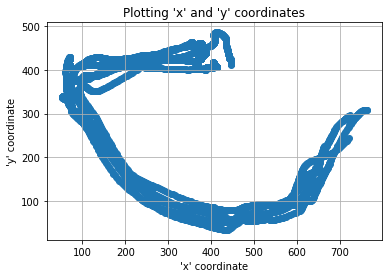

In [7]:
# plot movement 
mkit.plot_movement(data, frm=0, to = 1000)

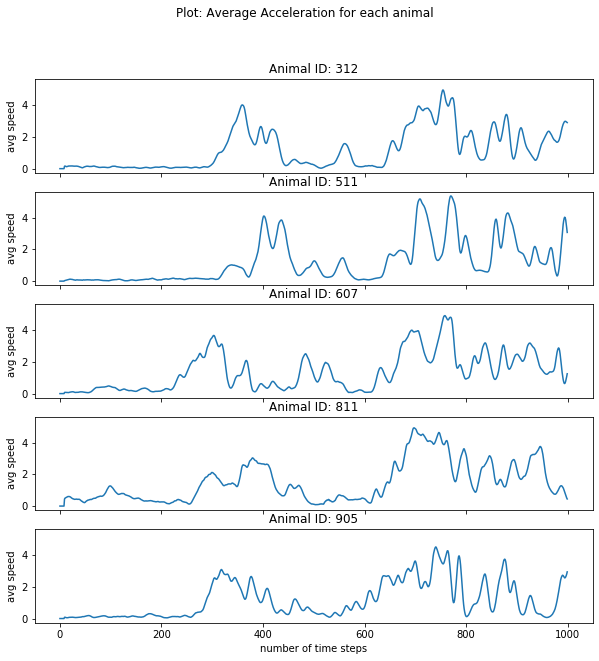

In [9]:
plot_pace(data_features, "speed")

### Save to CSV

In [15]:
# save features to csv 
data_features.to_csv("fish-5-features.csv")

In [16]:
# export the time series data 
ts_features.to_json("fish-5-time-series.json")